# Preparing the data

import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler

from pdpbox import pdp, get_dataset, info_plots
import shap
import lime
from lime import lime_tabular

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import and preprocess data

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
cols_meaning = ['age of patient', '1 = male, 0 = female', 'chest pain type', 'resting blood pressure (in mm Hg on admission to the hospital)', 'serum cholesterol in mg/dl', 'fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina (1 = yes; 0 = no)', 'ST depression induced by exercise relative to rest', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by fluorosopy', '3 = normal; 6 = fixed defect; 7 = reversable defect', 'heart disease = 1, no heart disease = 0']
cols_index = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'y']

cols_dict = {'feature':data.columns, 'meaning':cols_meaning} 
cols_df = pd.DataFrame(index=cols_index, data=cols_dict)

pd.set_option('display.max_colwidth', -1)

cols_df

,feature,meaning
x0,age,age of patient
x1,sex,"1 = male, 0 = female"
x2,cp,chest pain type
x3,trestbps,resting blood pressure (in mm Hg on admission to the hospital)
x4,chol,serum cholesterol in mg/dl
x5,fbs,fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
x6,restecg,resting electrocardiographic results
x7,thalach,maximum heart rate achieved
x8,exang,exercise induced angina (1 = yes; 0 = no)
x9,oldpeak,ST depression induced by exercise relative to rest


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


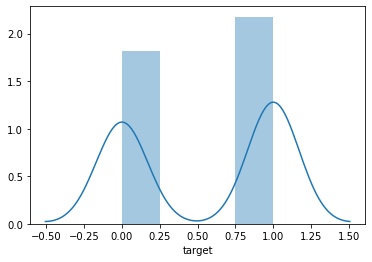

In [8]:
sn.distplot(data['target'])

In [9]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
y = data['target']
x = data.drop('target', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


# Interpretation

## Interpretable models

### Logistic Regression

In [12]:
model = LogisticRegression(random_state=10)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Accuracy on train:  ' + str(accuracy_score(y_train, y_train_pred)))
print('Recall on train:    ' + str(recall_score(y_train, y_train_pred)))

print('Accuracy on test:   ' + str(accuracy_score(y_test, y_test_pred)))
print('Recall on test:     ' + str(recall_score(y_test, y_test_pred)))

Accuracy on train:  0.8512396694214877
Recall on train:    0.9097744360902256
Accuracy on test:   0.8688524590163934
Recall on test:     0.875


In [14]:
d = {'feature': x_train.columns, 'meaning': cols_meaning[:-1], 'coefficient': model.coef_[0], 'odds': np.exp(model.coef_[0])}
df = pd.DataFrame(index=cols_index[:-1], data=d)
df.sort_values(by='odds', ascending=False)

,feature,meaning,coefficient,odds
x2,cp,chest pain type,0.788964,2.201114
x10,slope,the slope of the peak exercise ST segment,0.663470,1.941517
x6,restecg,resting electrocardiographic results,0.524790,1.690104
x5,fbs,fasting blood sugar > 120 mg/dl (1 = true; 0 = false),0.129914,1.138730
x7,thalach,maximum heart rate achieved,0.026051,1.026393
x0,age,age of patient,0.006637,1.006659
x4,chol,serum cholesterol in mg/dl,-0.002346,0.997657
x3,trestbps,resting blood pressure (in mm Hg on admission to the hospital),-0.012576,0.987503
x9,oldpeak,ST depression induced by exercise relative to rest,-0.613355,0.541531
x11,ca,number of major vessels (0-3) colored by fluorosopy,-0.771983,0.462096


age: one unit increase, 0.7% higher chance
sex: binary, females have a higher chance
cp: one unit increase, 120% higher chance
trestbps: one unit increase, 1.3% lower chance
chol: one unit increase, 0.2% lower chance
fbs: binary, 14% higher chance if true than when false
restecg: one unit increase, 69% higher chance
thalach: one unit increase, 2.6% higher chance
exang: binary, higher chance if false
oldpeak: one unit increase, 46% lower chance
slope: one unit increase, 94% higher chance
ca: one unit increase, 54% lower chance
thal: one unit increase, 58% lower chance

### Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(random_state=22)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=22, splitter='best')

In [16]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Accuracy on train:  ' + str(accuracy_score(y_train, y_train_pred)))
print('Recall on train:    ' + str(recall_score(y_train, y_train_pred)))

print('Accuracy on test:   ' + str(accuracy_score(y_test, y_test_pred)))
print('Recall on test:     ' + str(recall_score(y_test, y_test_pred)))

Accuracy on train:  1.0
Recall on train:    1.0
Accuracy on test:   0.8524590163934426
Recall on test:     0.78125


What's wrong with this tree?

In [17]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [18]:
tree_to_code(model, x_train.columns)

def tree(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
  if cp <= 0.5:
    if ca <= 0.5:
      if exang <= 0.5:
        if thal <= 2.5:
          if chol <= 316.5:
            return [[ 0. 18.]]
          else:  # if chol > 316.5
            if slope <= 1.5:
              return [[0. 1.]]
            else:  # if slope > 1.5
              return [[1. 0.]]
        else:  # if thal > 2.5
          if restecg <= 0.5:
            return [[3. 0.]]
          else:  # if restecg > 0.5
            if age <= 41.0:
              return [[1. 0.]]
            else:  # if age > 41.0
              return [[0. 3.]]
      else:  # if exang > 0.5
        if oldpeak <= 0.7000000178813934:
          if slope <= 1.5:
            if thalach <= 147.5:
              return [[3. 0.]]
            else:  # if thalach > 147.5
              return [[0. 1.]]
          else:  # if slope > 1.5
            if age <= 44.0:
              return [[1. 0.]]
            else:  # if a

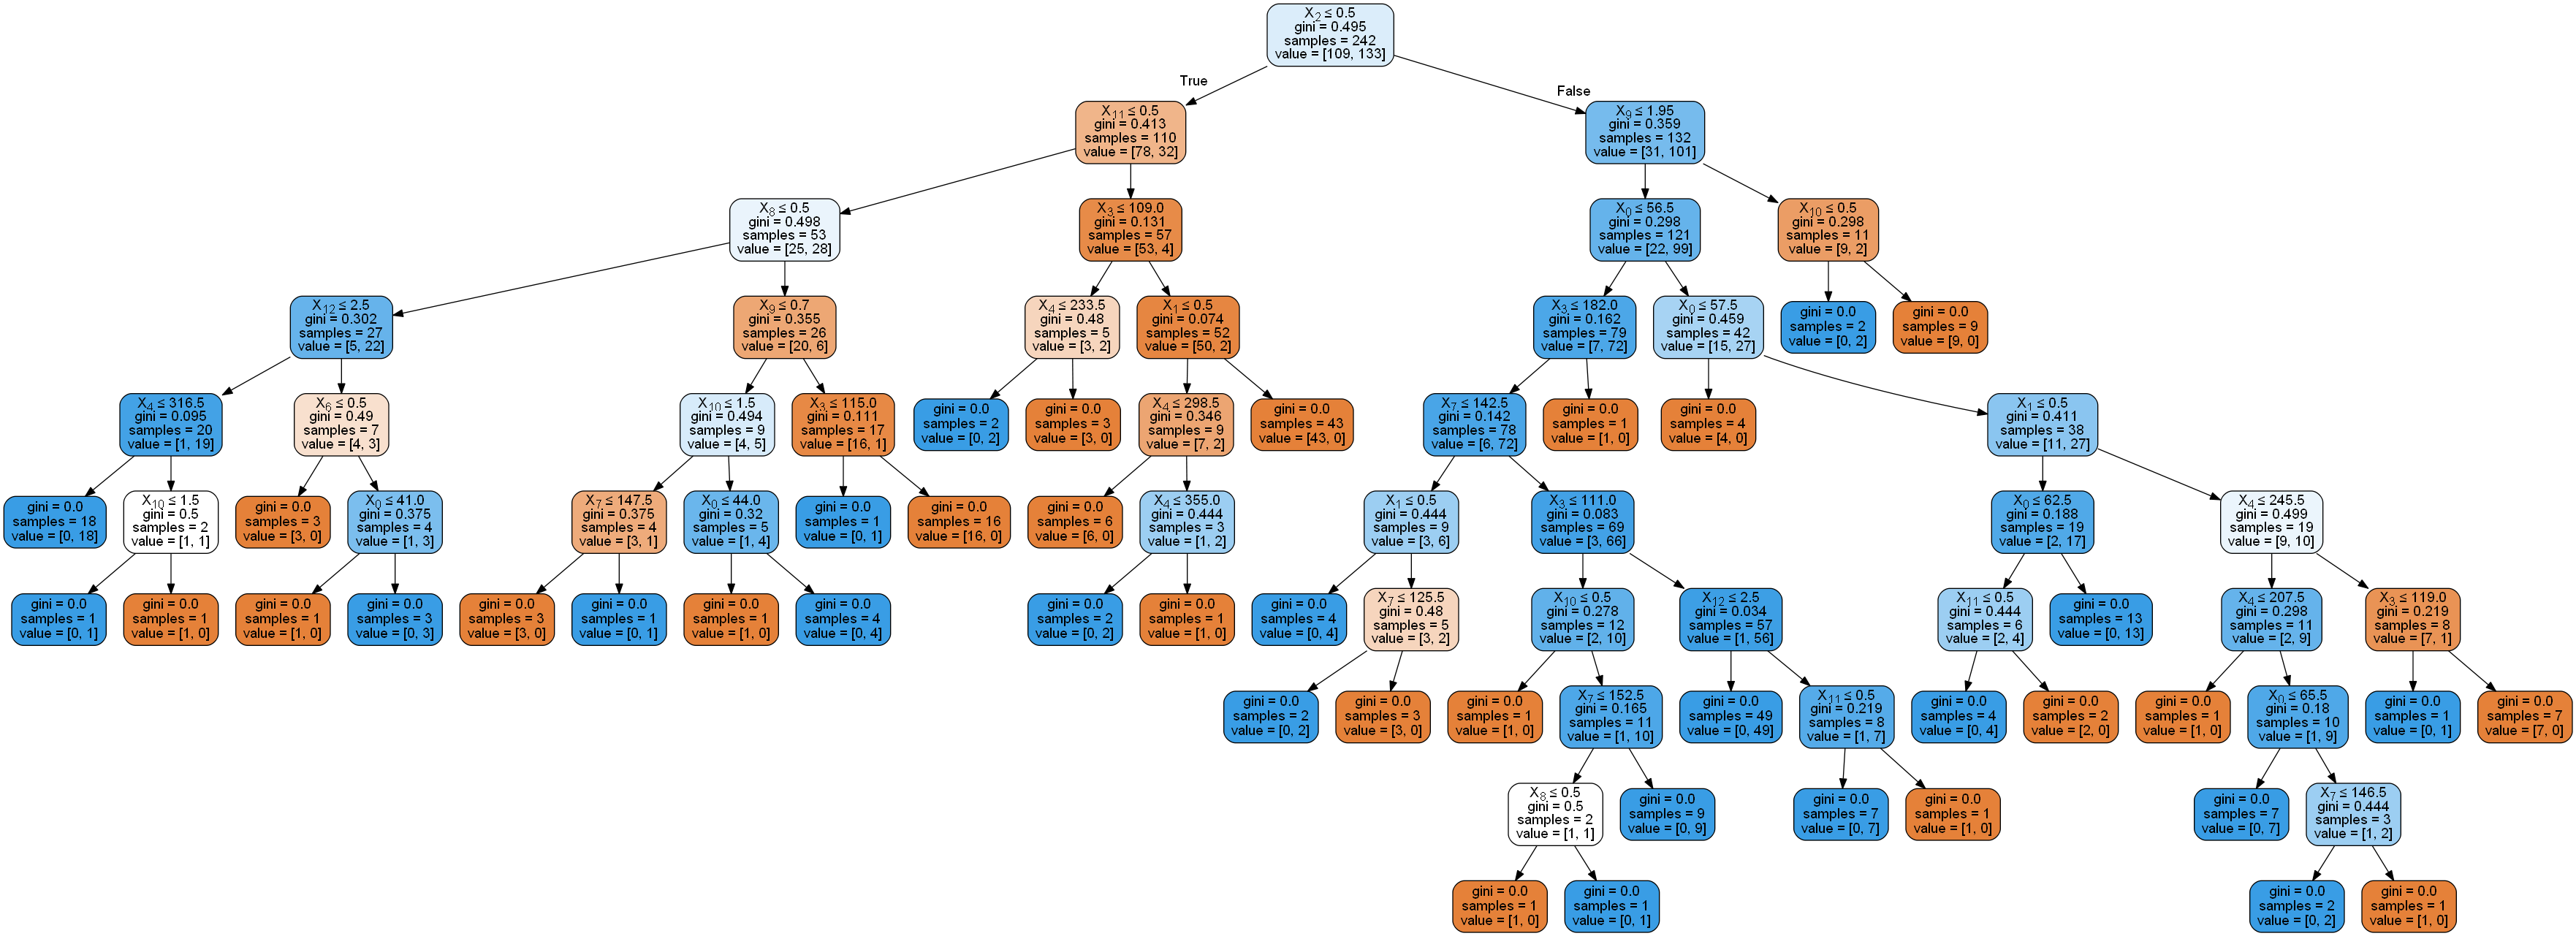

In [19]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
x_test.join(y_test)[0:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


In [21]:
model.feature_importances_

array([0.1008921 , 0.04101489, 0.2252627 , 0.05799396, 0.10295304,
       0.        , 0.01609693, 0.06167526, 0.0837675 , 0.09240169,
       0.05953032, 0.13308409, 0.02532753])

In [22]:
df['importances_tree'] = model.feature_importances_

In [23]:
df.sort_values('importances_tree', ascending=False)

,feature,meaning,coefficient,odds,importances_tree
x2,cp,chest pain type,0.788964,2.201114,0.225263
x11,ca,number of major vessels (0-3) colored by fluorosopy,-0.771983,0.462096,0.133084
x4,chol,serum cholesterol in mg/dl,-0.002346,0.997657,0.102953
x0,age,age of patient,0.006637,1.006659,0.100892
x9,oldpeak,ST depression induced by exercise relative to rest,-0.613355,0.541531,0.092402
x8,exang,exercise induced angina (1 = yes; 0 = no),-0.891962,0.409851,0.083767
x7,thalach,maximum heart rate achieved,0.026051,1.026393,0.061675
x10,slope,the slope of the peak exercise ST segment,0.663470,1.941517,0.059530
x3,trestbps,resting blood pressure (in mm Hg on admission to the hospital),-0.012576,0.987503,0.057994
x1,sex,"1 = male, 0 = female",-1.356947,0.257445,0.041015


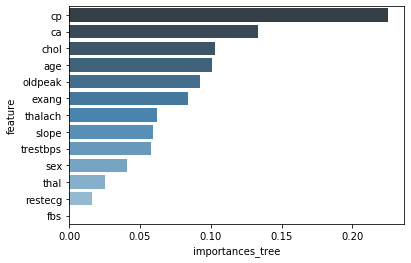

In [24]:
sn.barplot(x="importances_tree", y="feature", data=df.sort_values('importances_tree', ascending=False), palette="Blues_d")

## Model-agnostic methods

In [25]:
model = RandomForestClassifier(n_estimators=1000, random_state=1, max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Accuracy on train:  ' + str(accuracy_score(y_train, y_train_pred)))
print('Recall on train:    ' + str(recall_score(y_train, y_train_pred)))

print('Accuracy on test:   ' + str(accuracy_score(y_test, y_test_pred)))
print('Recall on test:     ' + str(recall_score(y_test, y_test_pred)))

Accuracy on train:  0.9504132231404959
Recall on train:    0.9849624060150376
Accuracy on test:   0.8688524590163934
Recall on test:     0.90625


In [27]:
df['importances_rf'] = model.feature_importances_

In [28]:
df.sort_values('importances_rf', ascending=False)

,feature,meaning,coefficient,odds,importances_tree,importances_rf
x11,ca,number of major vessels (0-3) colored by fluorosopy,-0.771983,0.462096,0.133084,0.149635
x9,oldpeak,ST depression induced by exercise relative to rest,-0.613355,0.541531,0.092402,0.133810
x2,cp,chest pain type,0.788964,2.201114,0.225263,0.128034
x12,thal,3 = normal; 6 = fixed defect; 7 = reversable defect,-0.859126,0.423532,0.025328,0.113033
x7,thalach,maximum heart rate achieved,0.026051,1.026393,0.061675,0.100257
x8,exang,exercise induced angina (1 = yes; 0 = no),-0.891962,0.409851,0.083767,0.083404
x0,age,age of patient,0.006637,1.006659,0.100892,0.077142
x10,slope,the slope of the peak exercise ST segment,0.663470,1.941517,0.059530,0.053875
x3,trestbps,resting blood pressure (in mm Hg on admission to the hospital),-0.012576,0.987503,0.057994,0.051795
x4,chol,serum cholesterol in mg/dl,-0.002346,0.997657,0.102953,0.051588


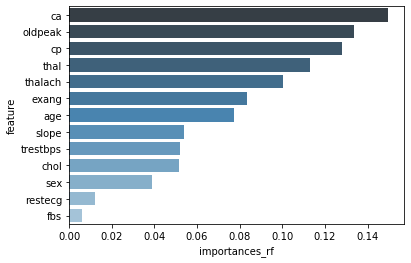

In [29]:
sn.barplot(x="importances_rf", y="feature", data=df.sort_values('importances_rf', ascending=False), palette="Blues_d")

### Permutation Feature Importance

In [30]:
from sklearn.ensemble.forest import _generate_unsampled_indices

def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

def oob_classifier_accuracy(rf, X_train, y_train):
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in rf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [rf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [31]:
imp = permutation_importances(model, x_test, y_test, oob_classifier_accuracy)

### Partial Dependence Plot

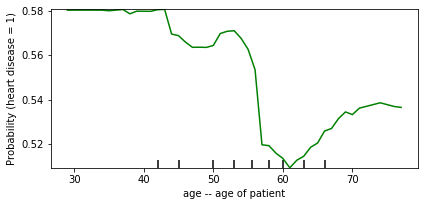

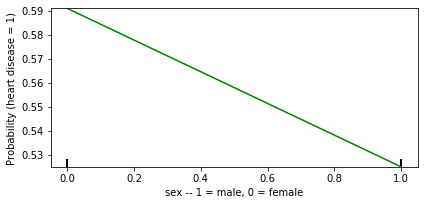

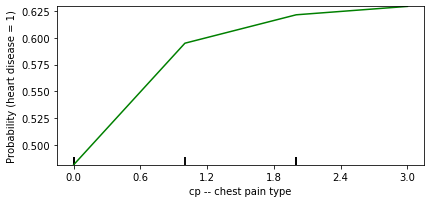

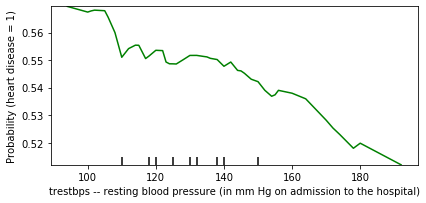

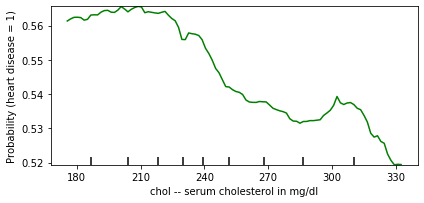

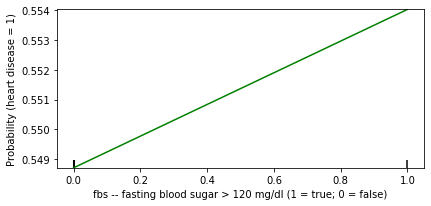

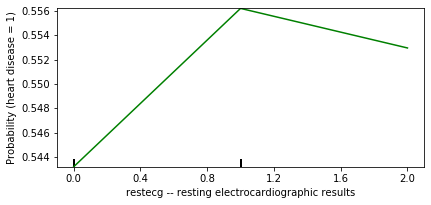

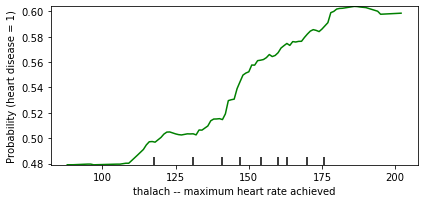

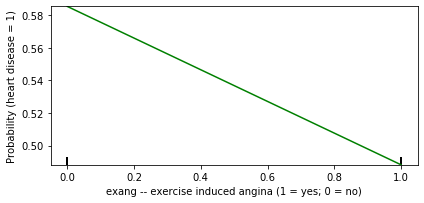

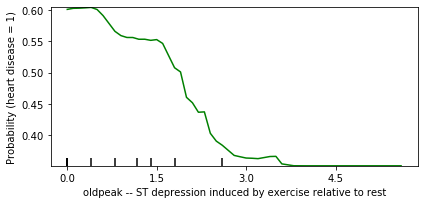

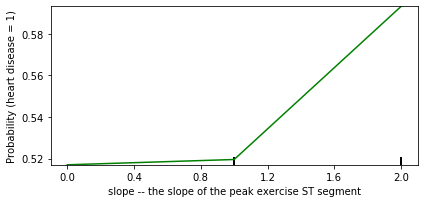

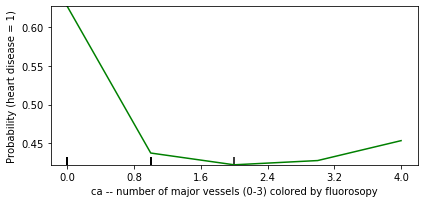

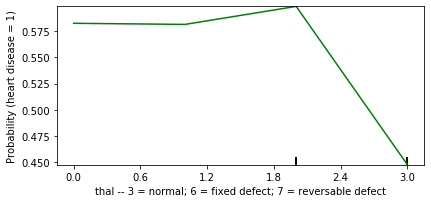

In [32]:
from sklearn.inspection import plot_partial_dependence

for i in range(len(x_train.columns)):
    plot_partial_dependence(model, x_train, [i])
    plt.xlabel(x.columns[i] + ' -- ' + cols_meaning[i])
    plt.ylabel('Probability (heart disease = 1)')
    plt.show()

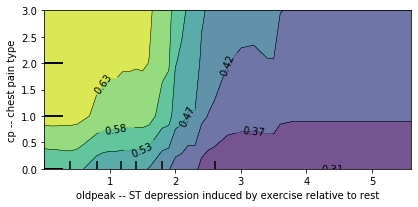

In [33]:
i = 9
j = 2

plot_partial_dependence(model, x_train, [(i,j)])
plt.xlabel(x.columns[i] + ' -- ' + cols_meaning[i])
plt.ylabel(x.columns[j] + ' -- ' + cols_meaning[j])
plt.show()

### Individual Conditional Expectation

,x,display_column,count,target
0,0,sex_0,96,0.750000
1,1,sex_1,207,0.449275


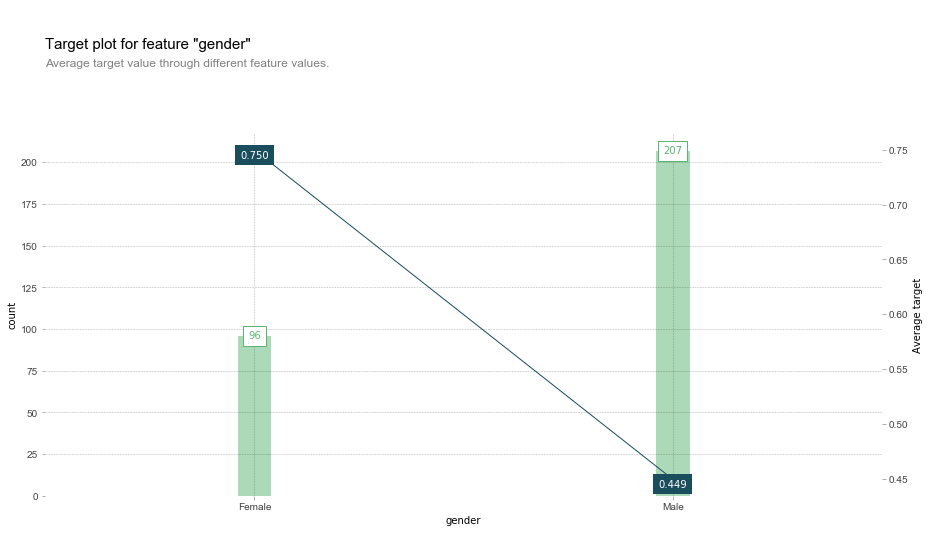

In [34]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='sex', feature_name='gender', target='target'
)
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

summary_df

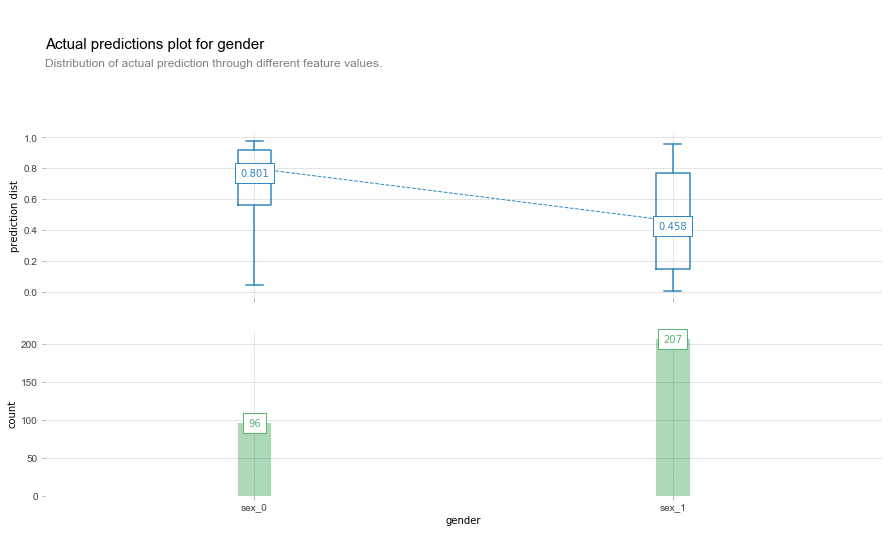

In [35]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data[df['feature']], feature='sex', feature_name='gender', predict_kwds={}
)

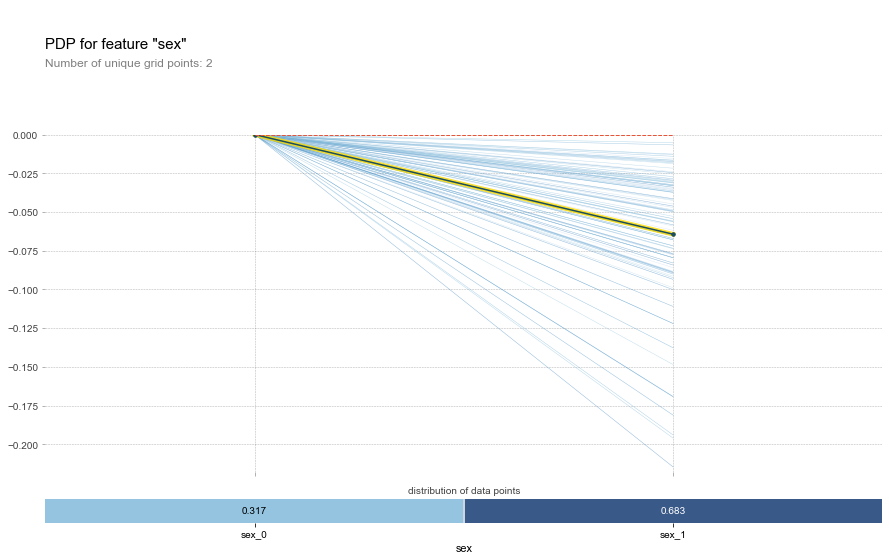

In [36]:
feature = 'sex'

pdp_ = pdp.pdp_isolate(
    model=model, dataset=data, model_features=df['feature'], feature=feature
)

fig, axes = pdp.pdp_plot(pdp_, feature, center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,target
0,0,"[126, 192.56)",126.000000,192.555556,"[0, 11.11)",0.00,11.11,34,0.529412
1,1,"[192.56, 207)",192.555556,207.000000,"[11.11, 22.22)",11.11,22.22,33,0.636364
2,2,"[207, 221.67)",207.000000,221.666667,"[22.22, 33.33)",22.22,33.33,34,0.705882
3,3,"[221.67, 234)",221.666667,234.000000,"[33.33, 44.44)",33.33,44.44,31,0.516129
4,4,"[234, 247)",234.000000,247.000000,"[44.44, 55.56)",44.44,55.56,35,0.657143
5,5,"[247, 263)",247.000000,263.000000,"[55.56, 66.67)",55.56,66.67,33,0.454545
6,6,"[263, 282)",263.000000,282.000000,"[66.67, 77.78)",66.67,77.78,34,0.558824
7,7,"[282, 306.44)",282.000000,306.444444,"[77.78, 88.89)",77.78,88.89,35,0.371429
8,8,"[306.44, 564]",306.444444,564.000000,"[88.89, 100]",88.89,100.00,34,0.470588


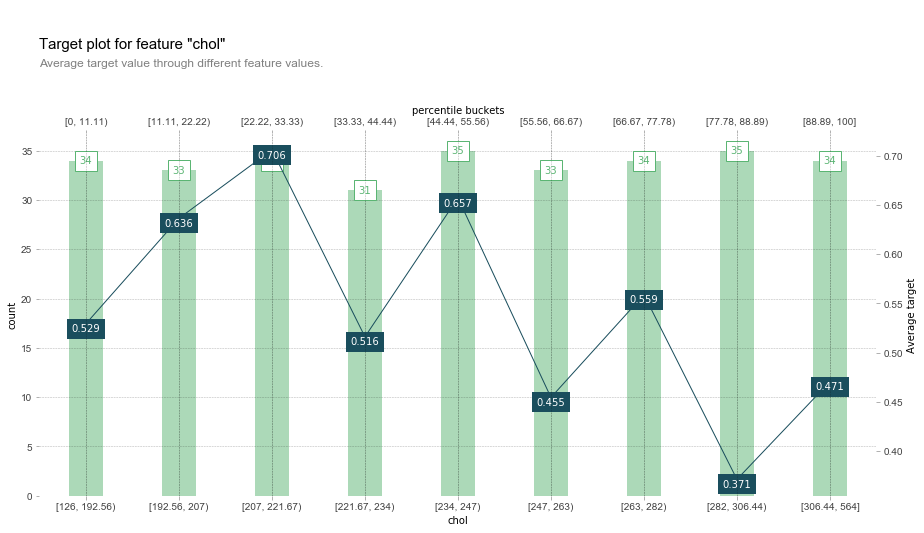

In [37]:
feature = 'chol'

fig, axes, summary_df = info_plots.target_plot(
    df=data, feature=feature, feature_name=feature, target='target', show_percentile=True
)
summary_df

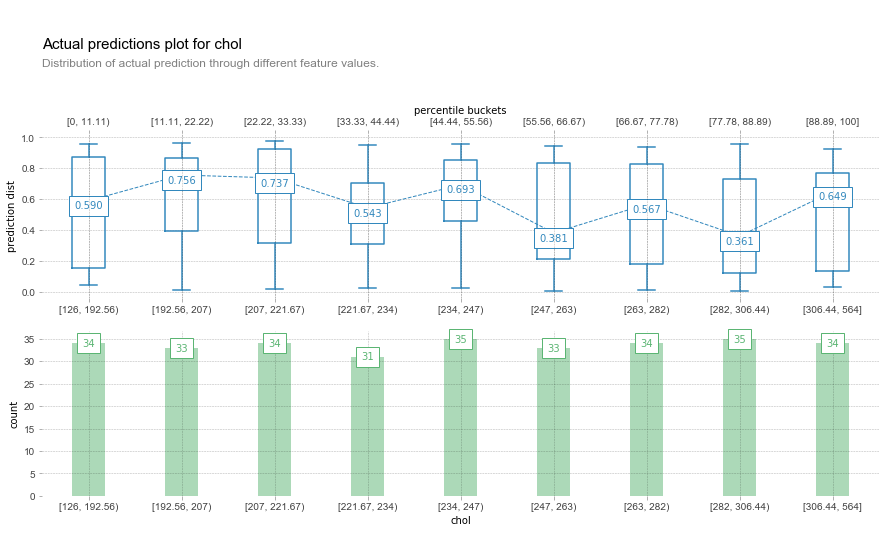

In [38]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data[df['feature']], feature=feature, feature_name=feature, 
    show_percentile=True, predict_kwds={}
)

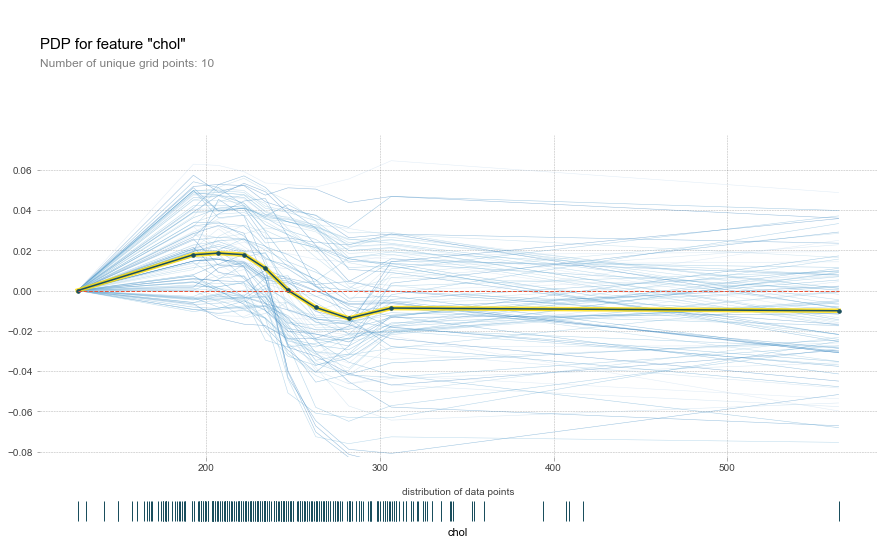

In [39]:
pdp_ = pdp.pdp_isolate(
    model=model, dataset=data, model_features=df['feature'], feature=feature
)

fig, axes = pdp.pdp_plot(pdp_, feature, center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

### LIME

In [40]:
explainer = lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns, class_names=['false', 'true'])

In [41]:
i = 2 #np.random.randint(0, x_test.shape[0])
print('Case:  ' + str(i))
print('Label: ' + str(y_test.iloc[i]))
npxtest = x_test.values
exp = explainer.explain_instance(npxtest[i], model.predict_proba, num_features=13, top_labels=1)

Case:  2
Label: 1


In [42]:
x_test.join(y_test)[2:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


In [43]:
exp.show_in_notebook(show_table=True)

### SHAP

In [44]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

i = 1
pred = model.predict(x_test.iloc[i].values.reshape(1,-1))[0]
print('Case:  ' + str(i))
print('Label: ' + str(y_test.iloc[i]))
print('Pred:  ' + str(pred))
shap.force_plot(explainer.expected_value[y_test.iloc[i]], shap_values[1][i], x_test.iloc[i], feature_names=x_train.columns)

Case:  1
Label: 0
Pred:  1


In [45]:
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test, feature_names=x_train.columns)

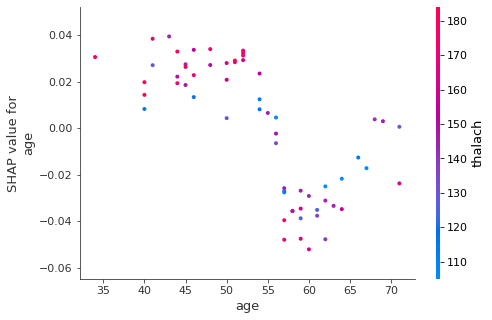

In [46]:
shap.dependence_plot("age", shap_values[1], x_test)

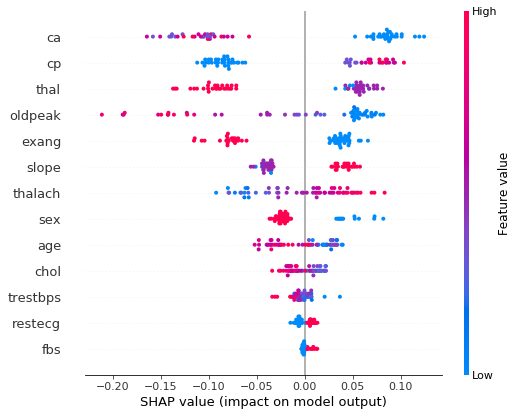

In [47]:
shap.summary_plot(shap_values[1], x_test)

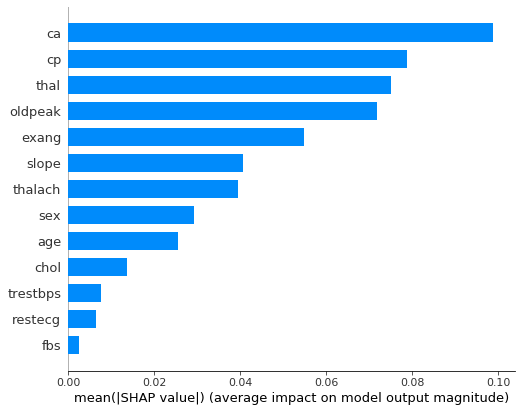

In [48]:
shap.summary_plot(shap_values[1], x_test, plot_type="bar")